In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import matplotlib.cm as cm

In [24]:
df = pd.read_csv('data.csv')

In [25]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

Text(0.5, 1.0, 'lat and long')

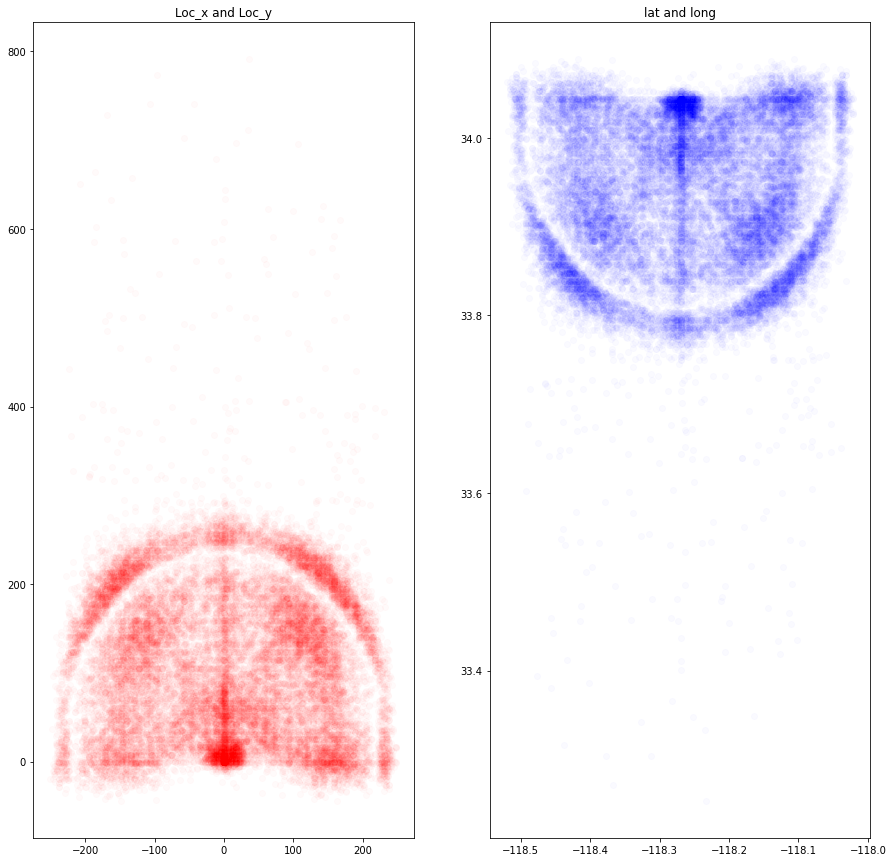

In [27]:
plt.figure(figsize=(15, 15))

# locx locy 
plt.subplot(121)
plt.scatter(df.loc_x, df.loc_y, color='red', alpha=0.02)
plt.title("Loc_x and Loc_y")

# latt, log
plt.subplot(122)
plt.scatter(df.lon, df.lat, color='blue', alpha=0.02)
plt.title("lat and long")

In [28]:
df['dist'] = np.sqrt(df['loc_x']**2+df['loc_y']**2)

loc_x_z = df['loc_x'] == 0
df['angle'] = np.array([0]*len(df))
df['angle'][~loc_x_z] = np.arctan(df['loc_y'][~loc_x_z]/df['loc_x'][~loc_x_z])
df['angle'][loc_x_z]=np.pi/2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,dist,angle
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,181.859836,0.407058
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,157.000000,-0.000000
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,168.600119,-0.928481
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,222.865430,0.903063
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0.000000,1.570796


In [30]:
df['remain_time'] = df['minutes_remaining']*60+df['seconds_remaining']
df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,dist,angle,remain_time
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,181.859836,0.407058,627
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,157.000000,-0.000000,622
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,168.600119,-0.928481,465
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,222.865430,0.903063,412
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0.000000,1.570796,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693,48.010416,1.549966,365
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694,0.000000,1.570796,365
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695,213.335417,-0.891663,208
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696,268.793601,1.455209,130


In [31]:
print(df['team_id'].unique())
print(df['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [32]:
pd.DataFrame({'matchup':df.matchup, 'opponent':df.opponent})

,matchup,opponent
0,LAL @ POR,POR
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
...,...,...
30692,LAL vs. IND,IND
30693,LAL vs. IND,IND
30694,LAL vs. IND,IND
30695,LAL vs. IND,IND


Text(0.5, 1.0, 'distance and shot distance')

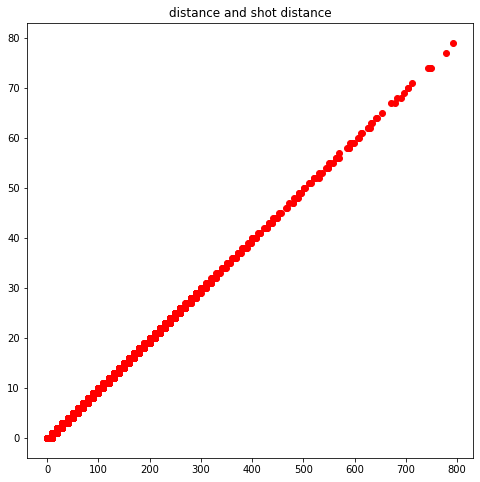

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(df.dist, df.shot_distance, color='red')
plt.title("distance and shot distance")

Text(0.5, 1.0, 'Shot_zone_range')

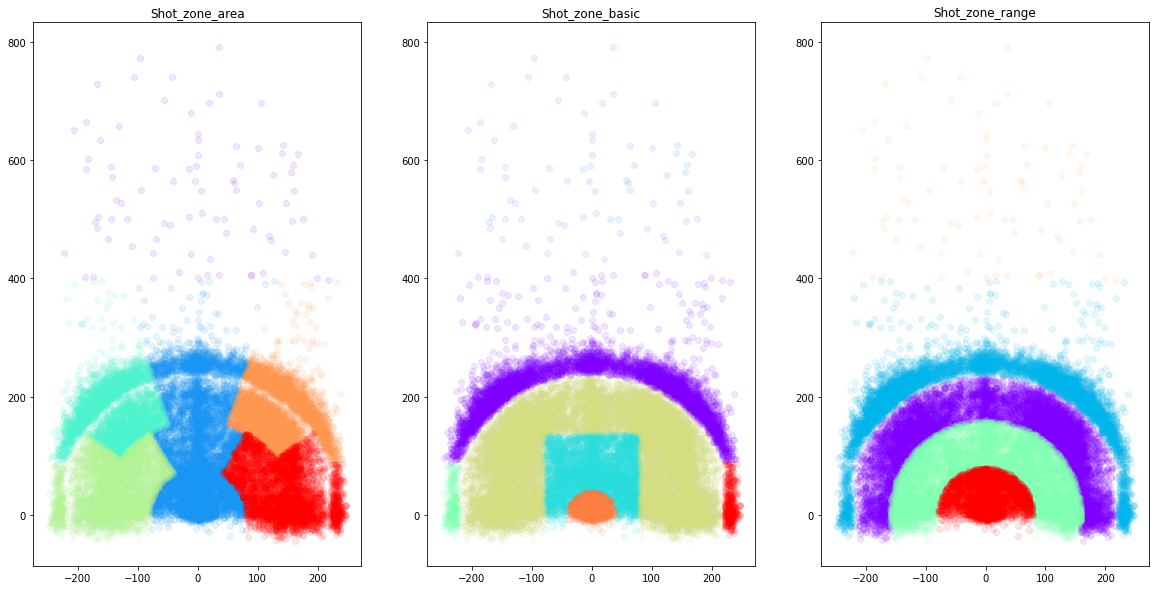

In [34]:
plt.figure(figsize=(20,10))
def scatter_plot_by_cat(feat):
  alpha=0.1
  gs = df.groupby(feat)
  cs = cm.rainbow(np.linspace(0,1,len(gs)))
  for g, c in zip(gs, cs):
    plt.scatter(g[1].loc_x,g[1].loc_y, color=c, alpha=alpha)

plt.subplot(131)
scatter_plot_by_cat('shot_zone_area')
plt.title('Shot_zone_area')  

plt.subplot(132)
scatter_plot_by_cat('shot_zone_basic')
plt.title('Shot_zone_basic')

plt.subplot(133)
scatter_plot_by_cat('shot_zone_range')
plt.title('Shot_zone_range')

In [35]:
drop_cols = ['shot_id', 'team_id', 'team_name', 'shot_distance', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic','game_id', 'game_date', 'game_event_id', 'loc_x', 'loc_y', 'lon', 'lat', 'minutes_remaining', 'seconds_remaining']
for drop in drop_cols:
  df=df.drop(drop, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
df.head()

,action_type,combined_shot_type,period,playoffs,season,shot_made_flag,shot_type,matchup,opponent,dist,angle,remain_time
0,Jump Shot,Jump Shot,1,0,2000-01,NaN,2PT Field Goal,LAL @ POR,POR,181.859836,0.407058,627
1,Jump Shot,Jump Shot,1,0,2000-01,0.0,2PT Field Goal,LAL @ POR,POR,157.000000,-0.000000,622
2,Jump Shot,Jump Shot,1,0,2000-01,1.0,2PT Field Goal,LAL @ POR,POR,168.600119,-0.928481,465
3,Jump Shot,Jump Shot,1,0,2000-01,0.0,2PT Field Goal,LAL @ POR,POR,222.865430,0.903063,412
4,Driving Dunk Shot,Dunk,2,0,2000-01,1.0,2PT Field Goal,LAL @ POR,POR,0.000000,1.570796,379
